In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load your dataset (replace 'dataset.csv' with your actual dataset file)
data = pd.read_csv("/content/drive/MyDrive/stroke_dataset.csv")
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
data.shape

(5110, 12)

In [ ]:
data.corr()

<ipython-input-8-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

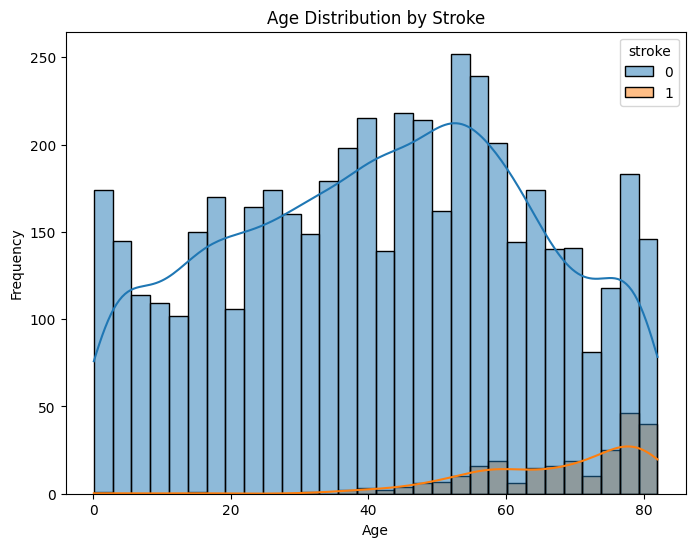

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='age', bins=30, hue='stroke', kde=True, common_norm=False)
plt.title('Age Distribution by Stroke')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

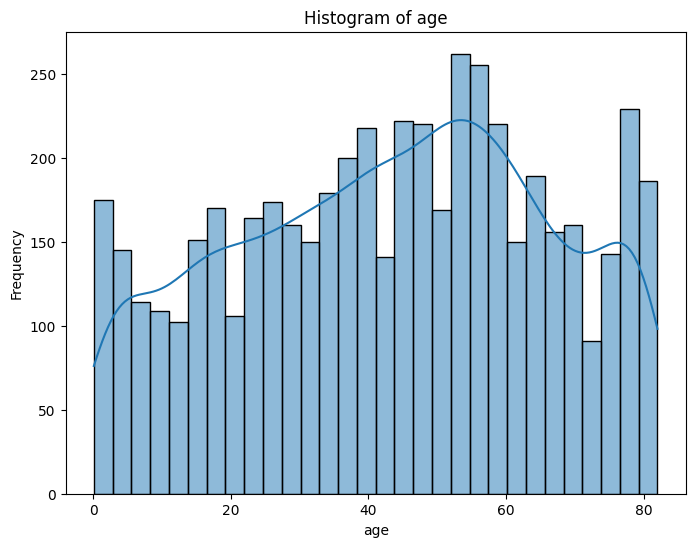

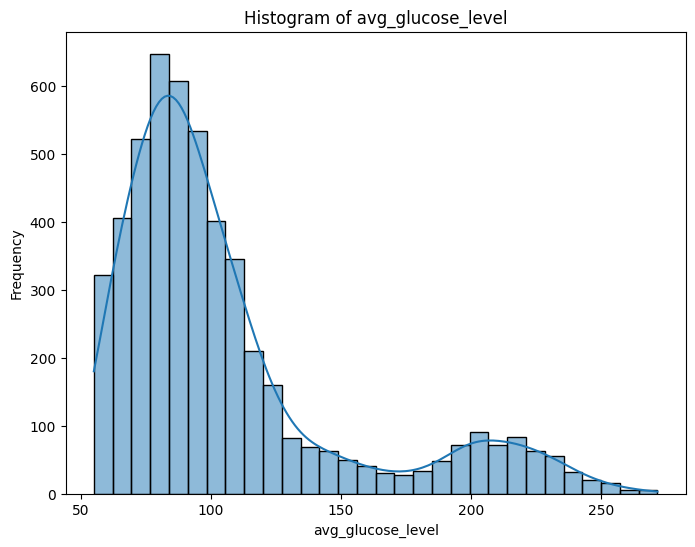

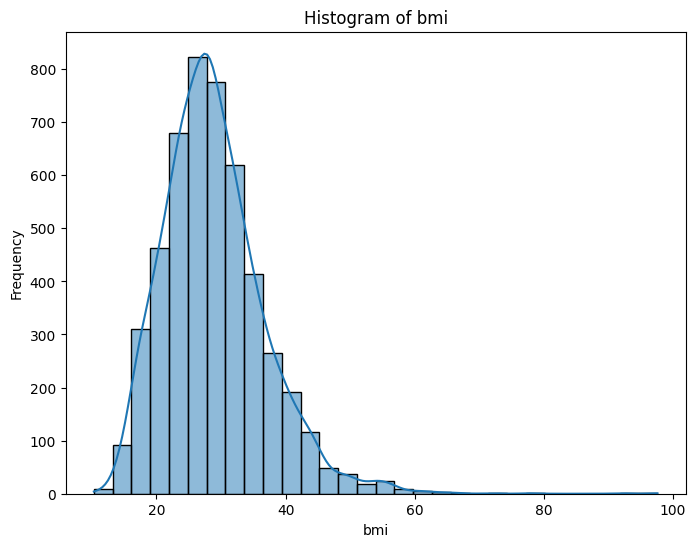

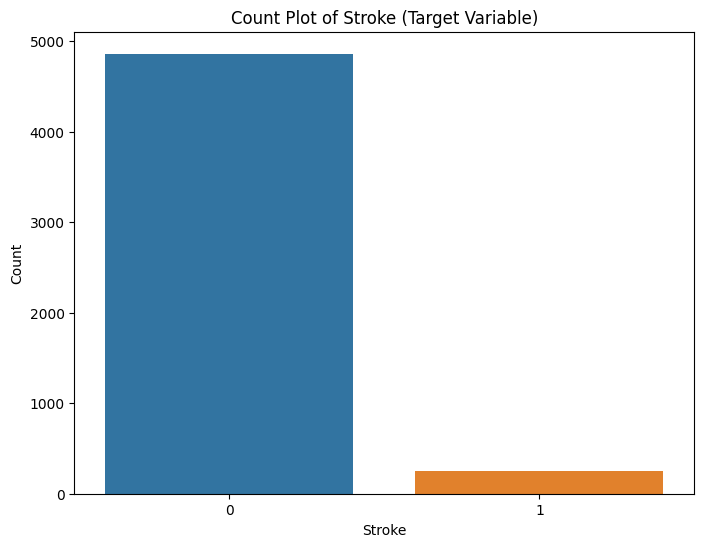

In [ ]:
# Create histograms for numerical columns
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column, bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Create a count plot for a categorical column (e.g., 'stroke')
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='stroke')
plt.title('Count Plot of Stroke (Target Variable)')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


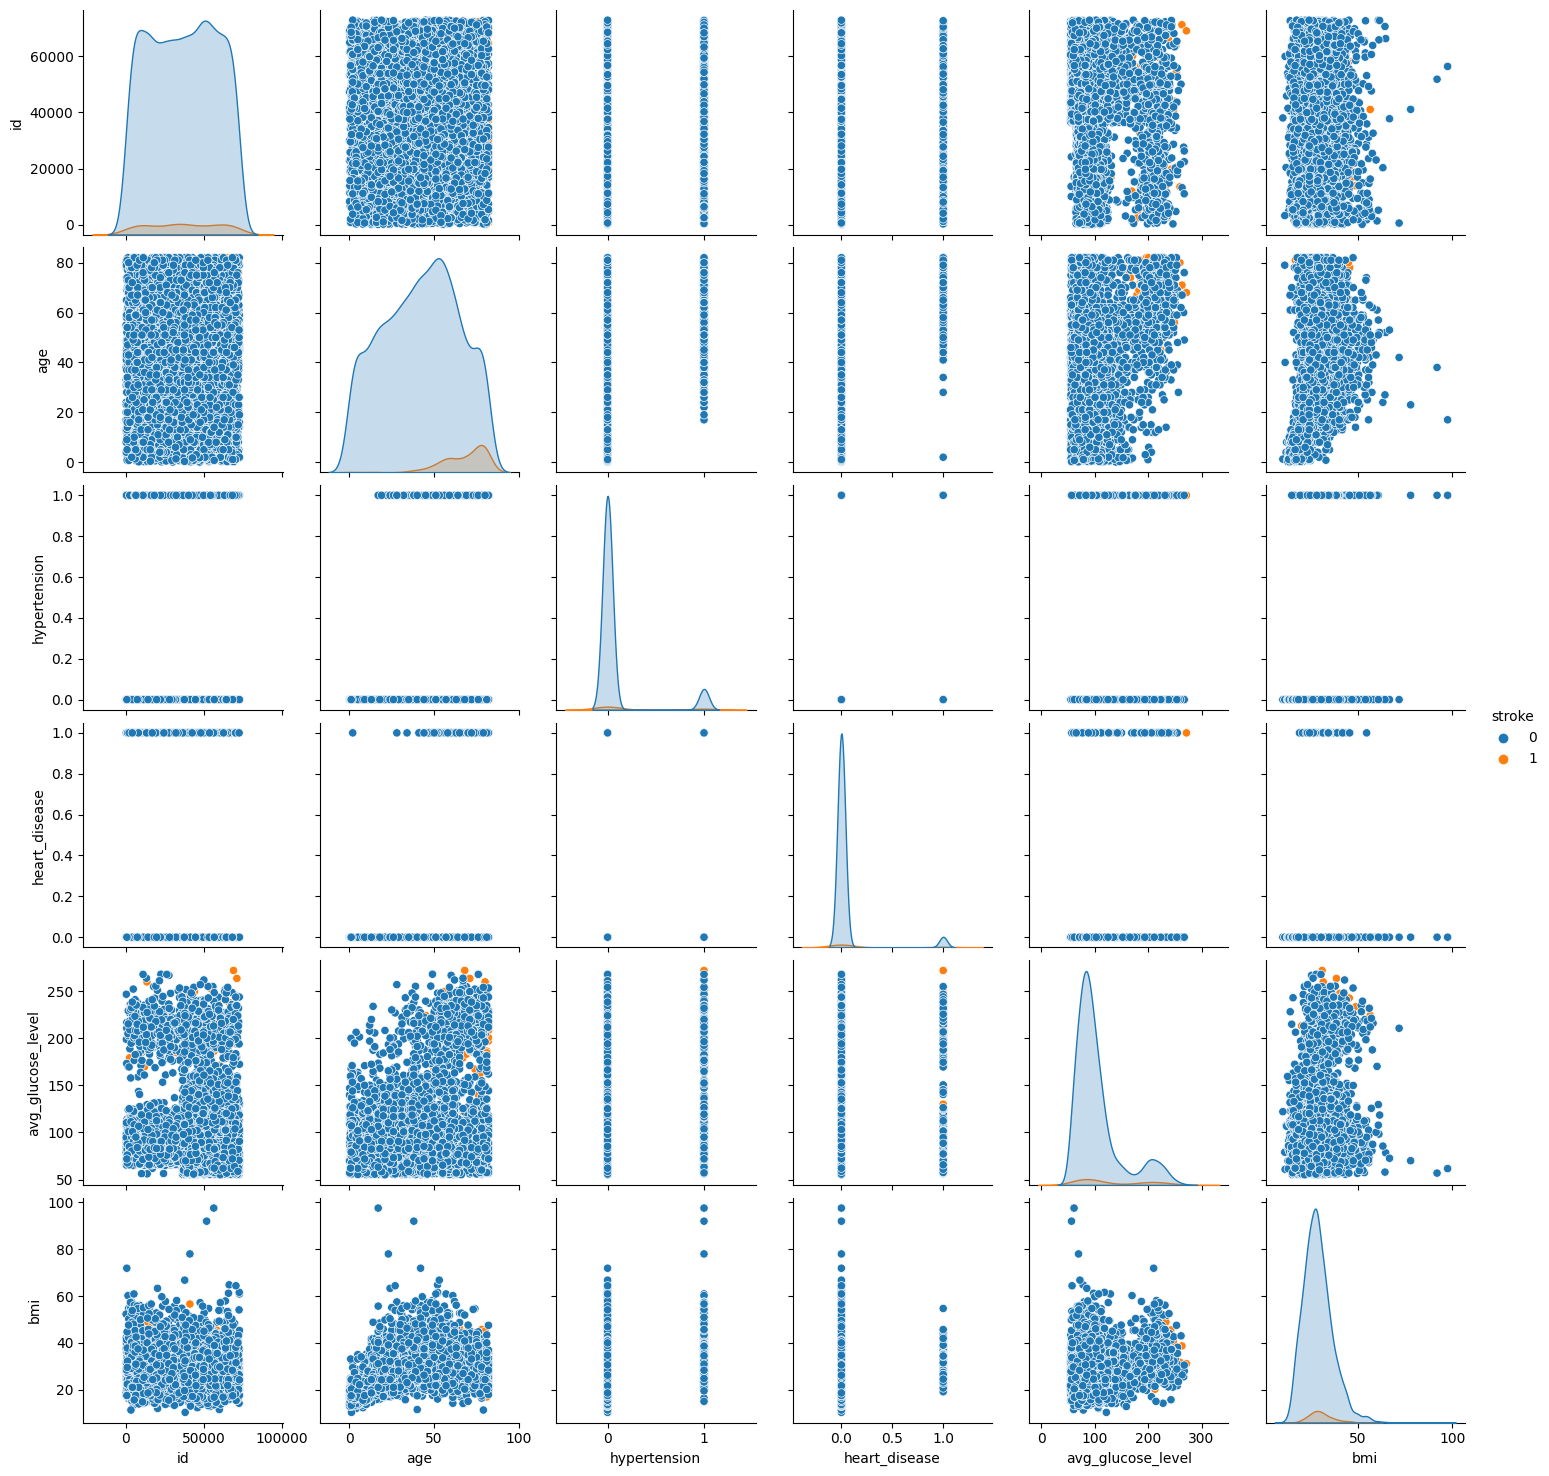

In [ ]:
sns.pairplot(data, hue='stroke')
plt.show()

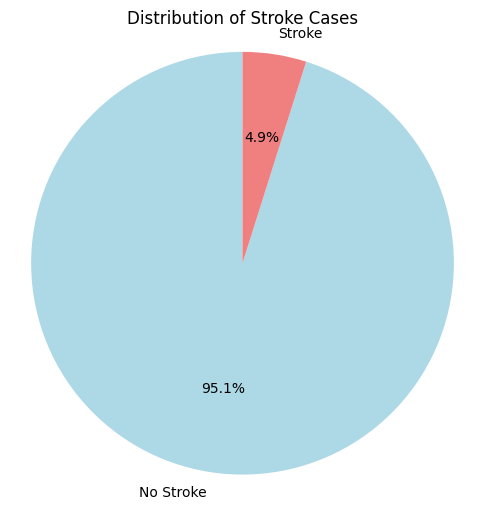

In [ ]:
# Count the number of each class in the 'stroke' variable
stroke_counts = data['stroke'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Stroke Cases')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


In [ ]:
# Select relevant columns for prediction
selected_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
data = data[selected_columns]

# Preprocess data
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM
X_train_lstm = np.expand_dims(X_train, axis=1)
X_test_lstm = np.expand_dims(X_test, axis=1)

# Build the LSTM Model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM Model
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the Model
test_loss, test_acc = model.evaluate(X_test_lstm, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
128/128 [==============================] - 4s 8ms/step - loss: nan - accuracy: 0.9464 - val_loss: nan - val_accuracy: 0.9393
Epoch 2/10
128/128 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9543 - val_loss: nan - val_accuracy: 0.9393
Epoch 3/10
128/128 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.9543 - val_loss: nan - val_accuracy: 0.9393
Epoch 4/10
128/128 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.9543 - val_loss: nan - val_accuracy: 0.9393
Epoch 5/10
128/128 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.9543 - val_loss: nan - val_accuracy: 0.9393
Epoch 6/10
128/128 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.9543 - val_loss: nan - val_accuracy: 0.9393
Epoch 7/10
128/128 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.9543 - val_loss: nan - val_accuracy: 0.9393
Epoch 8/10
128/128 [==========================